In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import seaborn as sns
import numpy as np
from scipy import ndimage


sys.path.append('../../shared')
from file_analyzer import FileAnalyzer


# Analyze your file
analyzer = FileAnalyzer('../../../data/independent_expenditure_2024.csv')
analyzer.print_summary()

# Get the DataFrame
df = analyzer.get_dataframe()

# https://www.fec.gov/campaign-finance-data/independent-expenditures-file-description/




FILE ANALYSIS SUMMARY
📁 File: independent_expenditure_2024.csv
📊 Type: CSV
💾 Size: 18.6 MB
📈 Shape: (73403, 23)
🔢 Columns: 23
📋 Rows: 73403


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73403 entries, 0 to 73402
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cand_id           63940 non-null  object 
 1   cand_name         73403 non-null  object 
 2   spe_id            73403 non-null  object 
 3   spe_nam           73400 non-null  object 
 4   ele_type          73403 non-null  object 
 5   can_office_state  60516 non-null  object 
 6   can_office_dis    73376 non-null  float64
 7   can_office        73387 non-null  object 
 8   cand_pty_aff      62661 non-null  object 
 9   exp_amo           73403 non-null  float64
 10  exp_date          47623 non-null  object 
 11  agg_amo           73243 non-null  float64
 12  sup_opp           73286 non-null  object 
 13  pur               73391 non-null  object 
 14  pay               73403 non-null  object 
 15  file_num          73403 non-null  int64  
 16  amndt_ind         73403 non-null  object

In [106]:
pd.set_option('display.max_columns', None)
# df.head()
df['cand_pty_aff'].value_counts()
# df[df['cand_name'].str.contains('Nate') & (df['exp_amo'] >= 123) & (df['exp_amo'] <= 20000)]
# df[df['exp_amo'] >= 8000000]

cand_pty_aff
DEMOCRATIC PARTY           34434
REPUBLICAN PARTY           27172
INDEPENDENT                  721
DEMOCRATIC-FARMER-LABOR      179
OTHER                         56
LIBERTARIAN PARTY             54
GREEN PARTY                   24
UNKNOWN                       17
UNAFFILIATED                   4
Name: count, dtype: int64

In [107]:
# Look at distinct candidate names and their counts
candidate_counts = df['cand_name'].value_counts()

print(f"Total number of distinct candidates: {len(candidate_counts)}")
print(f"\nTop 20 candidates by number of expenditures:")
print(candidate_counts.head(20))


Total number of distinct candidates: 1323

Top 20 candidates by number of expenditures:
cand_name
Harris, Kamala        8245
Trump, Donald         4193
HARRIS, KAMALA        4022
TRUMP, DONALD         2043
GALLEGO, RUBEN        2007
TRUMP, DONALD J.      1679
Baldwin, Tammy        1055
SUAREZ, FRANCIS X.     876
BROWNLEY, JULIA        829
ENGEL, KIRSTEN         800
SHAH, AMISH            796
HALEY, NIKKI           742
BILIRAKIS, GUS         740
SHEEHY, TIM            695
ROSEN, JACKY           683
TRANEL, MONICA         608
TESTER, R. JON         599
BALDWIN, TAMMY         517
MORENO, BERNIE         512
RUTHERFORD, JOHN       495
Name: count, dtype: int64


In [108]:
# Additional analysis of candidate data
print("Summary statistics:")
print(f"Total expenditures: {len(df)}")
print(f"Unique candidates: {df['cand_name'].nunique()}")
print(f"Average expenditures per candidate: {len(df) / df['cand_name'].nunique():.2f}")

print(f"\nCandidates with most expenditures:")
print(candidate_counts.head(10))

print(f"\nCandidates with least expenditures (appearing only once):")
single_occurrence = candidate_counts[candidate_counts == 1]
print(f"Number of candidates appearing only once: {len(single_occurrence)}")
print(single_occurrence.head(10))


Summary statistics:
Total expenditures: 73403
Unique candidates: 1323
Average expenditures per candidate: 55.48

Candidates with most expenditures:
cand_name
Harris, Kamala        8245
Trump, Donald         4193
HARRIS, KAMALA        4022
TRUMP, DONALD         2043
GALLEGO, RUBEN        2007
TRUMP, DONALD J.      1679
Baldwin, Tammy        1055
SUAREZ, FRANCIS X.     876
BROWNLEY, JULIA        829
ENGEL, KIRSTEN         800
Name: count, dtype: int64

Candidates with least expenditures (appearing only once):
Number of candidates appearing only once: 225
cand_name
Trump, don                  1
LAMB, MARK                  1
DAVE, MCCORMICK             1
Shankland, Katrina          1
Nez, Jonathan               1
Protasiewicz, Janet         1
tRUMP, dONALD               1
Marshall, Derek             1
Swartz, Jessica             1
WELDE, MATTHEW BRADY MR.    1
Name: count, dtype: int64


In [109]:
spender_counts = df['spe_nam'].value_counts()

print(f"Total number of distinct spenders: {len(spender_counts)}")
print(f"\nTop 20 spenders by number of expenditures:")
print(spender_counts.head(20))

Total number of distinct spenders: 1080

Top 20 spenders by number of expenditures:
spe_nam
Worker Power                                                                              4028
Americans for Prosperity Action, Inc. (AFP Action) DBA CVA Action and DBA LIBRE Action    3205
PROTECT OUR WINTERS ACTION FUND                                                           2098
Congressional Leadership Fund                                                             2060
Republican Accountability PAC                                                             1655
HMP                                                                                       1617
For Our Future                                                                            1599
SUPPORT AMERICA'S POLICE PAC                                                              1452
SENATE CONSERVATIVES FUND                                                                 1437
America PAC                                          

In [110]:
# Examine the four key columns
columns_to_examine = ['spe_nam', 'cand_pty_aff', 'pur', 'exp_amo']

print("Column Information:")
print("=" * 50)
for col in columns_to_examine:
    print(f"\n{col}:")
    print(f"  Data type: {df[col].dtype}")
    print(f"  Non-null count: {df[col].notna().sum()}")
    print(f"  Null count: {df[col].isna().sum()}")
    print(f"  Unique values: {df[col].nunique()}")
    
    if col == 'exp_amo':
        print(f"  Min value: ${df[col].min():,.2f}")
        print(f"  Max value: ${df[col].max():,.2f}")
        print(f"  Mean value: ${df[col].mean():,.2f}")
        print(f"  Median value: ${df[col].median():,.2f}")
    else:
        print(f"  Sample values: {df[col].dropna().head(5).tolist()}")


Column Information:

spe_nam:
  Data type: object
  Non-null count: 73400
  Null count: 3
  Unique values: 1080
  Sample values: [' Go America PAC', '1000 Women Strong PAC', '1000 Women Strong PAC', '1000 Women Strong PAC', '1199 SEIU New York State Political Action Fund']

cand_pty_aff:
  Data type: object
  Non-null count: 62661
  Null count: 10742
  Unique values: 9
  Sample values: ['REPUBLICAN PARTY', 'DEMOCRATIC PARTY', 'DEMOCRATIC PARTY', 'DEMOCRATIC PARTY', 'DEMOCRATIC PARTY']

pur:
  Data type: object
  Non-null count: 73391
  Null count: 12
  Unique values: 5782
  Sample values: ['texts supporting Gabe Evans CO-8', 'Advertising Services', 'Estimated costs of consultant work', 'Production Costs for Ads', 'Event Coordination (Estimate)']

exp_amo:
  Data type: float64
  Non-null count: 73403
  Null count: 0
  Unique values: 30221
  Min value: $-580,000.00
  Max value: $9,978,412,568.00
  Mean value: $676,801.18
  Median value: $1,608.14


In [111]:
# Top spenders (spe_nam)
print("TOP 15 SPENDERS:")
print("=" * 50)
top_spenders = df['spe_nam'].value_counts().head(15)
for spender, count in top_spenders.items():
    print(f"{spender}: {count:,} expenditures")

print(f"\nTotal unique spenders: {df['spe_nam'].nunique():,}")


TOP 15 SPENDERS:
Worker Power: 4,028 expenditures
Americans for Prosperity Action, Inc. (AFP Action) DBA CVA Action and DBA LIBRE Action: 3,205 expenditures
PROTECT OUR WINTERS ACTION FUND: 2,098 expenditures
Congressional Leadership Fund: 2,060 expenditures
Republican Accountability PAC: 1,655 expenditures
HMP: 1,617 expenditures
For Our Future: 1,599 expenditures
SUPPORT AMERICA'S POLICE PAC: 1,452 expenditures
SENATE CONSERVATIVES FUND: 1,437 expenditures
America PAC: 1,306 expenditures
RED SENATE: 1,282 expenditures
VETERANS AID PAC: 1,026 expenditures
Rise Action Fund: 1,019 expenditures
FIREFIGHTERS COALITION OF AMERICA PAC: 960 expenditures
Power to the Polls Federal Fund: 908 expenditures

Total unique spenders: 1,080


In [112]:
# Party affiliations (cand_pty_aff)
print("CANDIDATE PARTY AFFILIATIONS:")
print("=" * 50)
party_counts = df['cand_pty_aff'].value_counts()
for party, count in party_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{party}: {count:,} ({percentage:.1f}%)")

print(f"\nTotal unique parties: {df['cand_pty_aff'].nunique()}")
print(f"Missing party data: {df['cand_pty_aff'].isna().sum():,} ({df['cand_pty_aff'].isna().sum()/len(df)*100:.1f}%)")


CANDIDATE PARTY AFFILIATIONS:
DEMOCRATIC PARTY: 34,434 (46.9%)
REPUBLICAN PARTY: 27,172 (37.0%)
INDEPENDENT: 721 (1.0%)
DEMOCRATIC-FARMER-LABOR: 179 (0.2%)
OTHER: 56 (0.1%)
LIBERTARIAN PARTY: 54 (0.1%)
GREEN PARTY: 24 (0.0%)
UNKNOWN: 17 (0.0%)
UNAFFILIATED: 4 (0.0%)

Total unique parties: 9
Missing party data: 10,742 (14.6%)


In [113]:
# Expenditure purposes (pur)
print("EXPENDITURE PURPOSES:")
print("=" * 50)
purpose_counts = df['pur'].value_counts()
for purpose, count in purpose_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{purpose}: {count:,} ({percentage:.1f}%)")

print(f"\nTotal unique purposes: {df['pur'].nunique()}")
print(f"Missing purpose data: {df['pur'].isna().sum():,} ({df['pur'].isna().sum()/len(df)*100:.1f}%)")


EXPENDITURE PURPOSES:
Payroll: 3,932 (5.4%)
CAGING AND DATABASE SERVICES(ESTIMATE): 1,674 (2.3%)
PHONEBANK IT/TECH SUPPORT(ESTIMATE): 1,672 (2.3%)
PHONEBANK PAYROLL SERVICES(ESTIMATE): 1,672 (2.3%)
LEADS / PHONE LISTS(ESTIMATE): 1,572 (2.1%)
MEDIA PRODUCTION: 1,339 (1.8%)
DIGITAL ADS: 1,271 (1.7%)
MEDIA PLACEMENT: 1,124 (1.5%)
Canvassing: 904 (1.2%)
Field Canvassing: 879 (1.2%)
Digital Advertising: 866 (1.2%)
MAILER POSTAGE: 628 (0.9%)
DIRECT MAIL: 628 (0.9%)
MAILER PRODUCTION: 618 (0.8%)
MEDIA: 613 (0.8%)
Telephone Calls and Text Messaging: 577 (0.8%)
Digital Advertising - Estimate: 577 (0.8%)
Direct Mail: 541 (0.7%)
CANVASSING: 531 (0.7%)
TEXT MESSAGES: 480 (0.7%)
DIGITAL PLACEMENT: 472 (0.6%)
Media Buy: 469 (0.6%)
PRINTING / POSTAGE: 437 (0.6%)
Media Production - Estimate: 431 (0.6%)
PRINTING/POSTAGE: 416 (0.6%)
MMS Messaging (Estimate): 408 (0.6%)
Phonebank Payroll Services(Estimate): 394 (0.5%)
Caging and Database Services(Estimate): 394 (0.5%)
PHONEBANK IT/TECH SUPPORT(Estimate):

In [114]:
# Expenditure amounts (exp_amo) analysis
print("EXPENDITURE AMOUNTS ANALYSIS:")
print("=" * 50)

# Basic statistics
print(f"Total expenditures: {len(df):,}")
print(f"Total amount spent: ${df['exp_amo'].sum():,.2f}")
print(f"Average expenditure: ${df['exp_amo'].mean():,.2f}")
print(f"Median expenditure: ${df['exp_amo'].median():,.2f}")
print(f"Largest single expenditure: ${df['exp_amo'].max():,.2f}")
print(f"Smallest single expenditure: ${df['exp_amo'].min():,.2f}")

# Distribution by amount ranges
print(f"\nEXPENDITURE AMOUNT DISTRIBUTION:")
ranges = [
    (0, 100, "Under $100"),
    (100, 1000, "$100 - $1,000"),
    (1000, 10000, "$1,000 - $10,000"),
    (10000, 100000, "$10,000 - $100,000"),
    (100000, float('inf'), "Over $100,000")
]

for min_amt, max_amt, label in ranges:
    if max_amt == float('inf'):
        count = len(df[df['exp_amo'] >= min_amt])
    else:
        count = len(df[(df['exp_amo'] >= min_amt) & (df['exp_amo'] < max_amt)])
    percentage = (count / len(df)) * 100
    print(f"{label}: {count:,} ({percentage:.1f}%)")


EXPENDITURE AMOUNTS ANALYSIS:
Total expenditures: 73,403
Total amount spent: $49,679,236,749.38
Average expenditure: $676,801.18
Median expenditure: $1,608.14
Largest single expenditure: $9,978,412,568.00
Smallest single expenditure: $-580,000.00

EXPENDITURE AMOUNT DISTRIBUTION:
Under $100: 14,173 (19.3%)
$100 - $1,000: 19,115 (26.0%)
$1,000 - $10,000: 16,308 (22.2%)
$10,000 - $100,000: 16,880 (23.0%)
Over $100,000: 6,906 (9.4%)


In [115]:
# Top expenditures by amount
print("LARGEST EXPENDITURES:")
print("=" * 50)
top_expenditures = df.nlargest(10, 'exp_amo')[['spe_nam', 'cand_name', 'cand_pty_aff', 'pur', 'exp_amo']]
for idx, row in top_expenditures.iterrows():
    print(f"${row['exp_amo']:,.2f} - {row['spe_nam']} → {row['cand_name']} ({row['cand_pty_aff']}) - {row['pur']}")

print(f"\nLARGEST SPENDERS BY TOTAL AMOUNT:")
print("=" * 50)
spender_totals = df.groupby('spe_nam')['exp_amo'].sum().sort_values(ascending=False).head(10)
for spender, total in spender_totals.items():
    print(f"{spender}: ${total:,.2f}")


LARGEST EXPENDITURES:
$9,978,412,568.00 - THE COURT OF DIVINE JUSTICE → Akhlaghy, Nader (REPUBLICAN PARTY) - Political Contribution
$9,778,412,568.00 - THE COMMITTEE OF 300 → Akhlaghy, Nader (REPUBLICAN PARTY) - Political Contribution
$9,000,000,000.00 - THE COMMITTEE OF 300 → Akhlaghy, Nader (REPUBLICAN PARTY) - DEPOSIT FOR WINNING IN ELECTION
$7,959,594,848.00 - THE COMMITTEE OF 300 → Akhlaghy, Nader (REPUBLICAN PARTY) - FOR WIN THIS ELECTION
$6,347,882,325.00 - Republican Emo Girl → Bounnharat, Amandra (REPUBLICAN PARTY) - Senate campaign.
$579,874,829.00 - The Masonic Illuminati Eye → Akhlaghy, Nader (REPUBLICAN PARTY) - Political Contribution
$255,000,000.00 - Gus Associates → White, Walter (REPUBLICAN PARTY) - funding for waltuh white's campaign
$114,056,874.00 - Food & Water Action → Harris, Kamala (DEMOCRATIC PARTY) - Voter outreach
$114,056,874.00 - Food & Water Action → Harris, Kamala (DEMOCRATIC PARTY) - Voter outreach
$114,056,874.00 - Food & Water Action → Harris, Kamala (

In [116]:
# Convert the DD-MMM-YY format dates and show grouping options
print("WORKING WITH DD-MMM-YY DATE FORMAT:")
print("=" * 50)

# Convert exp_date from DD-MMM-YY format to datetime
df['exp_date_parsed'] = pd.to_datetime(df['exp_date'], format='%d-%b-%y', errors='coerce')

print(f"✅ Successfully converted {df['exp_date_parsed'].notna().sum():,} dates")
print(f"❌ Failed to convert {df['exp_date_parsed'].isna().sum():,} dates")

# Show date range
min_date = df['exp_date_parsed'].min()
max_date = df['exp_date_parsed'].max()
print(f"\nDate range: {min_date.strftime('%B %d, %Y')} to {max_date.strftime('%B %d, %Y')}")

# Create different time groupings
df['exp_year'] = df['exp_date_parsed'].dt.year
df['exp_month'] = df['exp_date_parsed'].dt.to_period('M')
df['exp_quarter'] = df['exp_date_parsed'].dt.to_period('Q')
df['exp_week'] = df['exp_date_parsed'].dt.to_period('W')

print(f"\nGROUPING OPTIONS:")
print(f"  Years: {df['exp_year'].nunique()} unique years")
print(f"  Months: {df['exp_month'].nunique()} unique months") 
print(f"  Quarters: {df['exp_quarter'].nunique()} unique quarters")
print(f"  Weeks: {df['exp_week'].nunique()} unique weeks")


WORKING WITH DD-MMM-YY DATE FORMAT:
✅ Successfully converted 47,623 dates
❌ Failed to convert 25,780 dates

Date range: January 02, 2023 to December 30, 2024

GROUPING OPTIONS:
  Years: 2 unique years
  Months: 24 unique months
  Quarters: 8 unique quarters
  Weeks: 105 unique weeks


In [117]:
# Example: Group expenditures by month
print("EXPENDITURES BY MONTH:")
print("=" * 50)
monthly_expenditures = df.groupby('exp_month').agg({
    'exp_amo': ['count', 'sum', 'mean'],
    'spe_nam': 'nunique'
}).round(2)

monthly_expenditures.columns = ['Count', 'Total_Amount', 'Avg_Amount', 'Unique_Spenders']
monthly_expenditures = monthly_expenditures.sort_index()

print(monthly_expenditures.head(10))

print(f"\nTotal amount by month (top 5):")
monthly_totals = df.groupby('exp_month')['exp_amo'].sum().sort_values(ascending=False)
for month, total in monthly_totals.head(5).items():
    print(f"  {month}: ${total:,.2f}")


EXPENDITURES BY MONTH:
           Count  Total_Amount  Avg_Amount  Unique_Spenders
exp_month                                                  
2023-01       39  1.938766e+05     4971.19                8
2023-02       54  4.348244e+05     8052.30               11
2023-03       73  3.746746e+06    51325.29                7
2023-04       94  1.338727e+07   142417.81               13
2023-05      196  1.676604e+07    85541.02               19
2023-06      335  2.738575e+08   817485.16               25
2023-07      606  2.487435e+07    41046.78               26
2023-08      399  3.259467e+07    81690.89               45
2023-09      337  4.319013e+07   128160.63               36
2023-10      333  3.613299e+07   108507.47               31

Total amount by month (top 5):
  2024-03: $15,374,253,696.62
  2024-04: $10,600,886,285.88
  2024-07: $8,131,498,119.91
  2024-10: $1,314,952,500.86
  2024-11: $1,066,618,818.14


In [118]:
# Example: Group by party and month
print("EXPENDITURES BY PARTY AND MONTH:")
print("=" * 50)
party_monthly = df.groupby(['cand_pty_aff', 'exp_month'])['exp_amo'].sum().unstack(fill_value=0)
print("Top 3 parties by total spending:")
top_parties = df.groupby('cand_pty_aff')['exp_amo'].sum().sort_values(ascending=False).head(3).index
print(party_monthly.loc[top_parties].round(2))


EXPENDITURES BY PARTY AND MONTH:
Top 3 parties by total spending:
exp_month           2023-01    2023-02     2023-03     2023-04     2023-05  \
cand_pty_aff                                                                 
REPUBLICAN PARTY  103981.01  316062.41  2231347.38  8113211.86  1170993.11   
DEMOCRATIC PARTY   10000.00   48387.02        0.00        0.00   350105.10   
INDEPENDENT        31902.28       0.00        0.00   157694.00   727239.24   

exp_month              2023-06      2023-07      2023-08      2023-09  \
cand_pty_aff                                                            
REPUBLICAN PARTY  2.647138e+08  20315210.81  24192719.81  27646665.09   
DEMOCRATIC PARTY  2.023108e+06    572181.67   3574521.79   2475226.57   
INDEPENDENT       0.000000e+00     21500.00     70644.25   1123542.14   

exp_month             2023-10      2023-11      2023-12      2024-01  \
cand_pty_aff                                                           
REPUBLICAN PARTY  22280826.46  19

In [119]:
spending_purposes = df['pur'].value_counts()

print(f"Total number of distinct spending purposes: {len(spending_purposes)}")
print(f"\nTop 20 spending purposes by number of expenditures:")
print(spending_purposes.head(20))



Total number of distinct spending purposes: 5782

Top 20 spending purposes by number of expenditures:
pur
Payroll                                   3932
CAGING AND DATABASE SERVICES(ESTIMATE)    1674
PHONEBANK IT/TECH SUPPORT(ESTIMATE)       1672
PHONEBANK PAYROLL SERVICES(ESTIMATE)      1672
LEADS / PHONE LISTS(ESTIMATE)             1572
MEDIA PRODUCTION                          1339
DIGITAL ADS                               1271
MEDIA PLACEMENT                           1124
Canvassing                                 904
Field Canvassing                           879
Digital Advertising                        866
MAILER POSTAGE                             628
DIRECT MAIL                                628
MAILER PRODUCTION                          618
MEDIA                                      613
Telephone Calls and Text Messaging         577
Digital Advertising - Estimate             577
Direct Mail                                541
CANVASSING                                 531
T

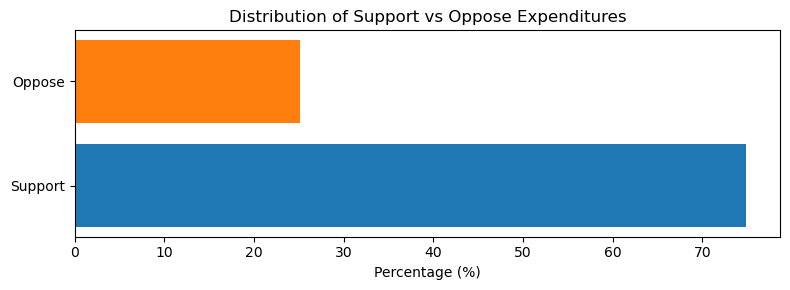

In [120]:
categories = ['Support', 'Oppose'] 
values = [74.9, 25.1]

plt.figure(figsize=(8, 3))
bars = plt.barh(categories, values, color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Percentage (%)')
plt.title('Distribution of Support vs Oppose Expenditures')

# Add value labels
for i, (bar, value) in enumerate(zip(bars, values)):
    plt.text(value + 1, i, '', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


What this shows: This will likely be a power law distribution where most candidates have very few expenditures, but a few candidates (like major presidential candidates) have thousands of expenditures.

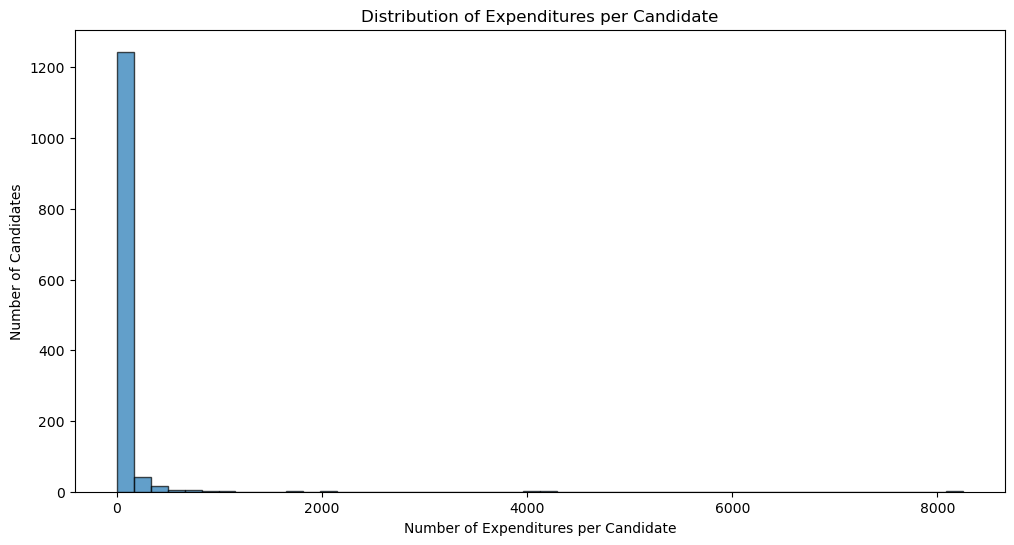

In [121]:
expenditures_per_candidate = df['cand_name'].value_counts()
plt.figure(figsize=(12, 6))
plt.hist(expenditures_per_candidate, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Number of Expenditures per Candidate')
plt.ylabel('Number of Candidates')
plt.title('Distribution of Expenditures per Candidate')
plt.show()

What this shows: This will be a categorical distribution showing the dominance of Democratic and Republican parties, with much smaller representation from other parties.

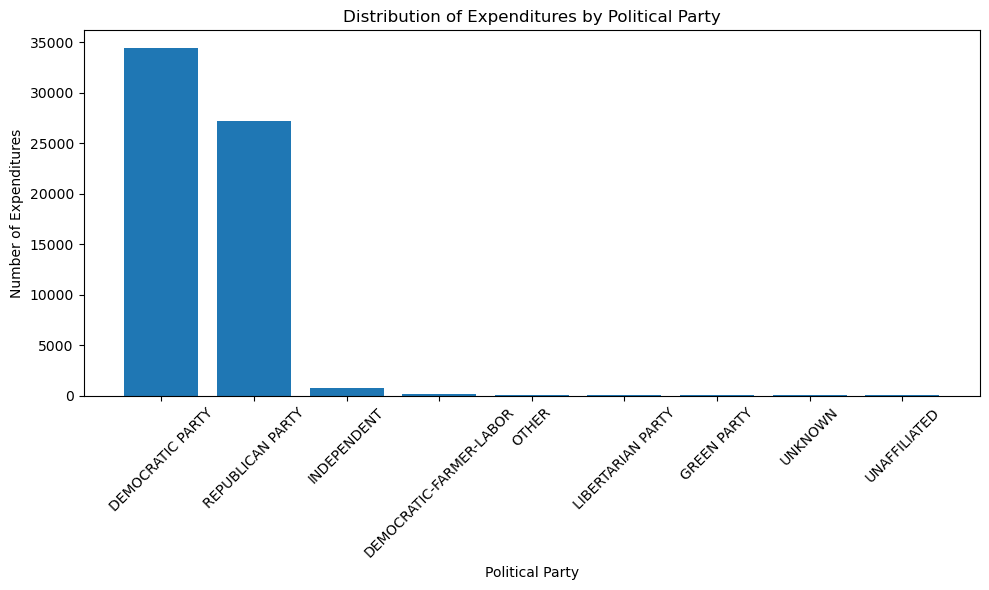

In [122]:
# Distribution of party affiliations
plt.figure(figsize=(10, 6))
party_counts = df['cand_pty_aff'].value_counts()
plt.bar(range(len(party_counts)), party_counts.values)
plt.xticks(range(len(party_counts)), party_counts.index, rotation=45)
plt.xlabel('Political Party')
plt.ylabel('Number of Expenditures')
plt.title('Distribution of Expenditures by Political Party')
plt.tight_layout()
plt.show()

 This will reveal if there are differences in spending patterns between parties - are Republican expenditures typically larger, smaller, or more variable than Democratic ones?

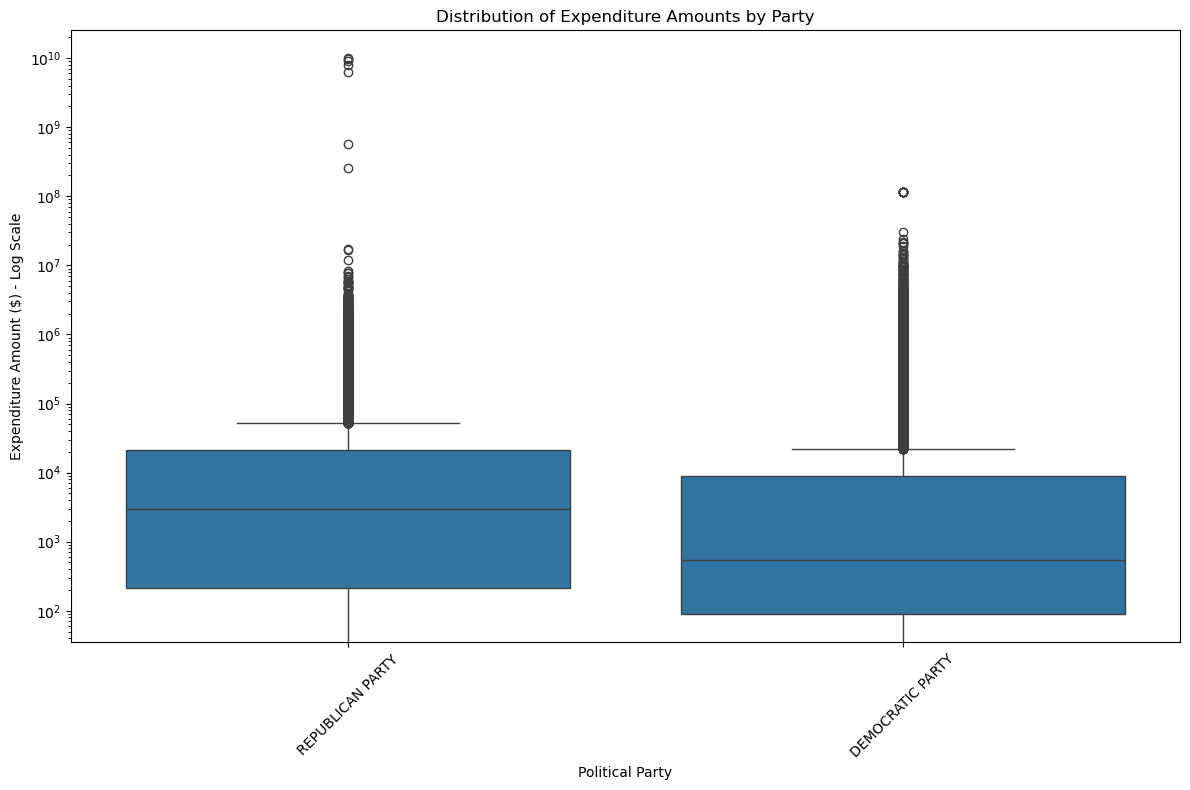

In [123]:
plt.figure(figsize=(12, 8))
df_filtered = df[df['cand_pty_aff'].isin(['DEMOCRATIC PARTY', 'REPUBLICAN PARTY'])]
sns.boxplot(data=df_filtered, x='cand_pty_aff', y='exp_amo')
plt.yscale('log')
plt.title('Distribution of Expenditure Amounts by Party')
plt.xlabel('Political Party')
plt.ylabel('Expenditure Amount ($) - Log Scale')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

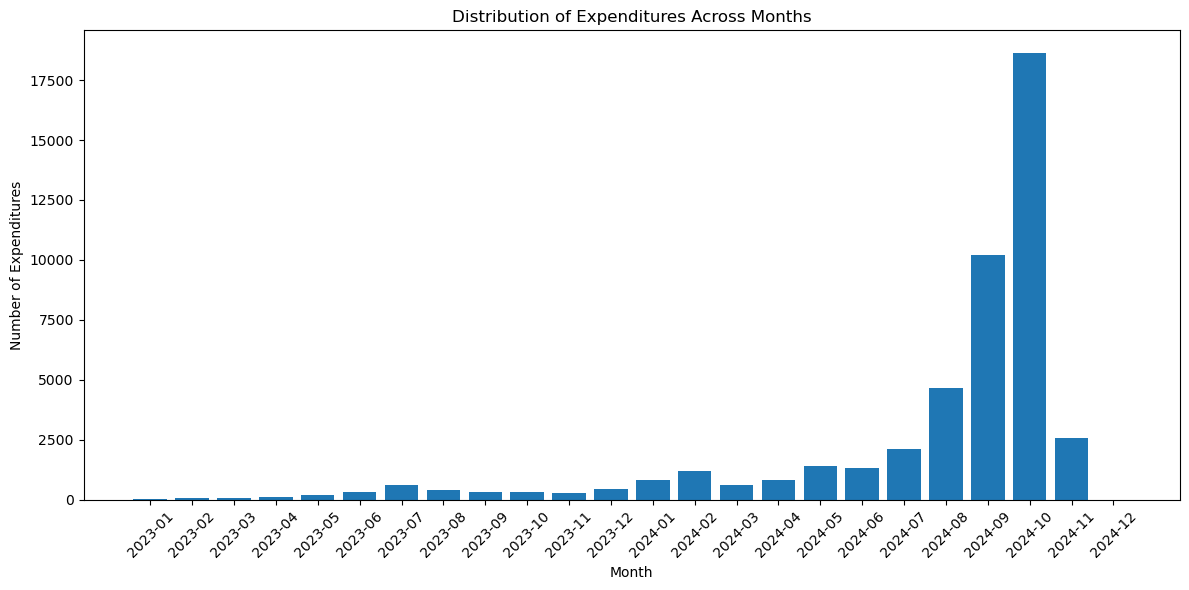

In [124]:
if 'exp_month' in df.columns:
    plt.figure(figsize=(12, 6))
    monthly_counts = df['exp_month'].value_counts().sort_index()
    plt.bar(range(len(monthly_counts)), monthly_counts.values)
    plt.xlabel('Month')
    plt.ylabel('Number of Expenditures')
    plt.title('Distribution of Expenditures Across Months')
    plt.xticks(range(len(monthly_counts)), monthly_counts.index, rotation=45)
    plt.tight_layout()
    plt.show()